In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/who-dataset/WHO.csv


In [2]:
df=pd.read_csv('../input/who-dataset/WHO.csv')

In [3]:
df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [4]:
df['Population']=df['Population'].apply(lambda x : x*1000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
Country                          194 non-null object
Region                           194 non-null object
Population                       194 non-null int64
Under15                          194 non-null float64
Over60                           194 non-null float64
FertilityRate                    183 non-null float64
LifeExpectancy                   194 non-null int64
ChildMortality                   194 non-null float64
CellularSubscribers              184 non-null float64
LiteracyRate                     103 non-null float64
GNI                              162 non-null float64
PrimarySchoolEnrollmentMale      101 non-null float64
PrimarySchoolEnrollmentFemale    101 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 19.8+ KB


In [6]:
df.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+07,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+08,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+03,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+06,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+06,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+07,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+09,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
for i in df:
    if df[i].dtypes !=object:
        print('\n')
        print('top '+i+' ++++++++++++++++')
        print(df.nlargest(10, i)[['Country',i]])



top Population ++++++++++++++++
                      Country  Population
35                      China  1390000000
77                      India  1240000000
185  United States of America   318000000
78                  Indonesia   247000000
23                     Brazil   199000000
128                  Pakistan   179000000
124                   Nigeria   169000000
13                 Bangladesh   155000000
141        Russian Federation   143000000
85                      Japan   127000000


top Under15 ++++++++++++++++
         Country  Under15
123        Niger    49.99
180       Uganda    48.54
33          Chad    48.52
4         Angola    47.58
0    Afghanistan    47.42
158      Somalia    47.35
104         Mali    47.14
192       Zambia    46.73
172  Timor-Leste    46.33
63        Gambia    45.90


top Over60 ++++++++++++++++
        Country  Over60
85        Japan   31.92
83        Italy   26.97
147  San Marino   26.97
65      Germany   26.72
25     Bulgaria   26.11
60      Finla

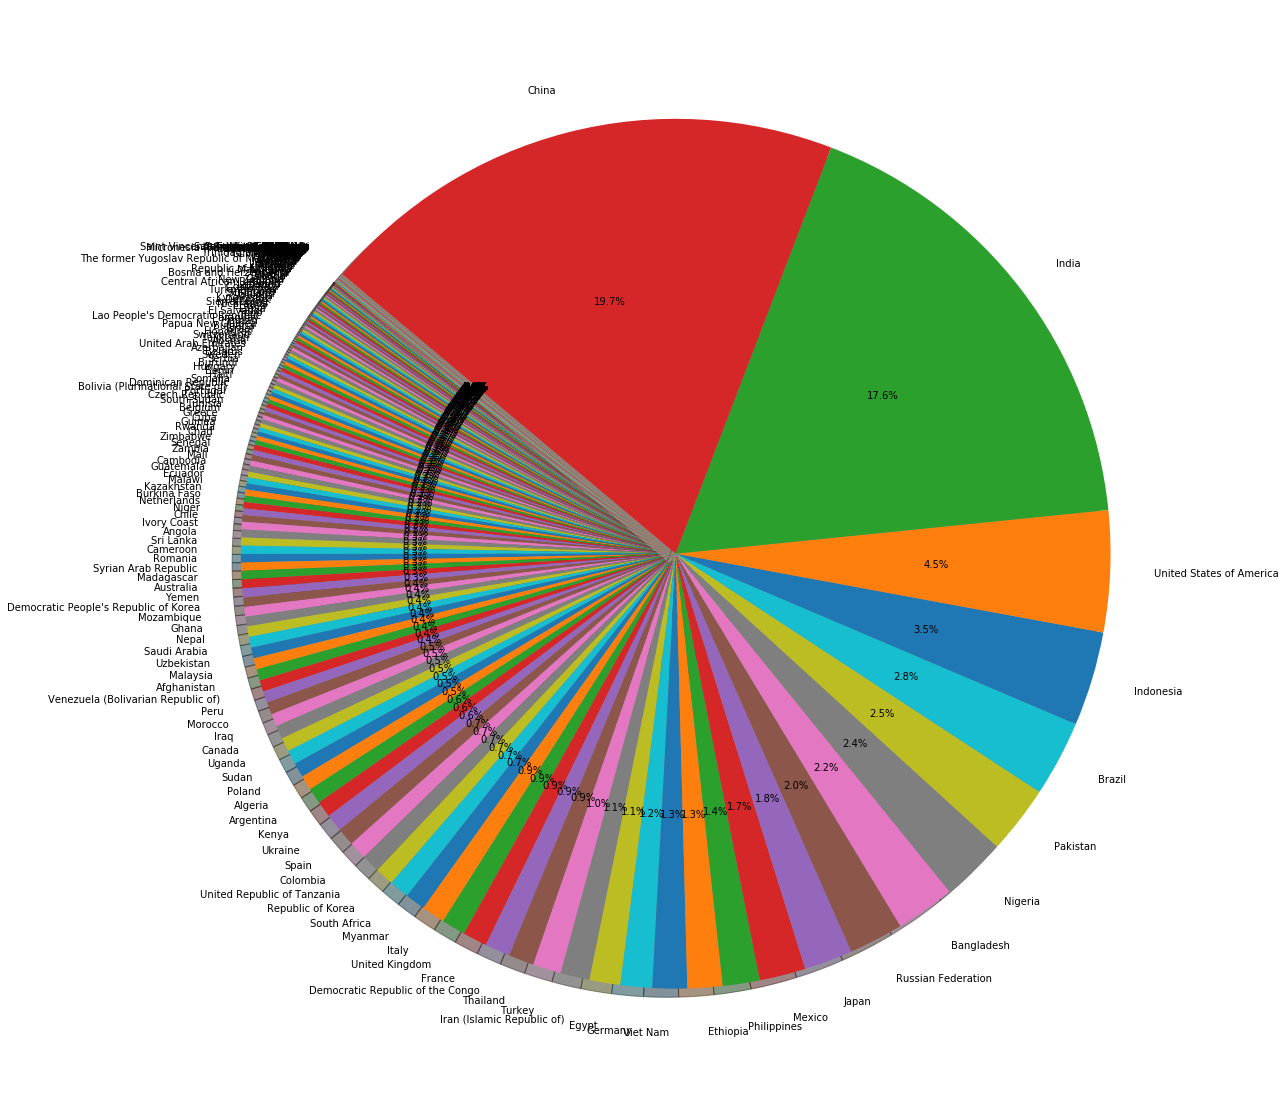

In [9]:
plt.figure(figsize=(20,20))
p=df.sort_values('Population')
plt.pie(p['Population'].values,labels=p['Country'].values,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [10]:
from sklearn.preprocessing import minmax_scale

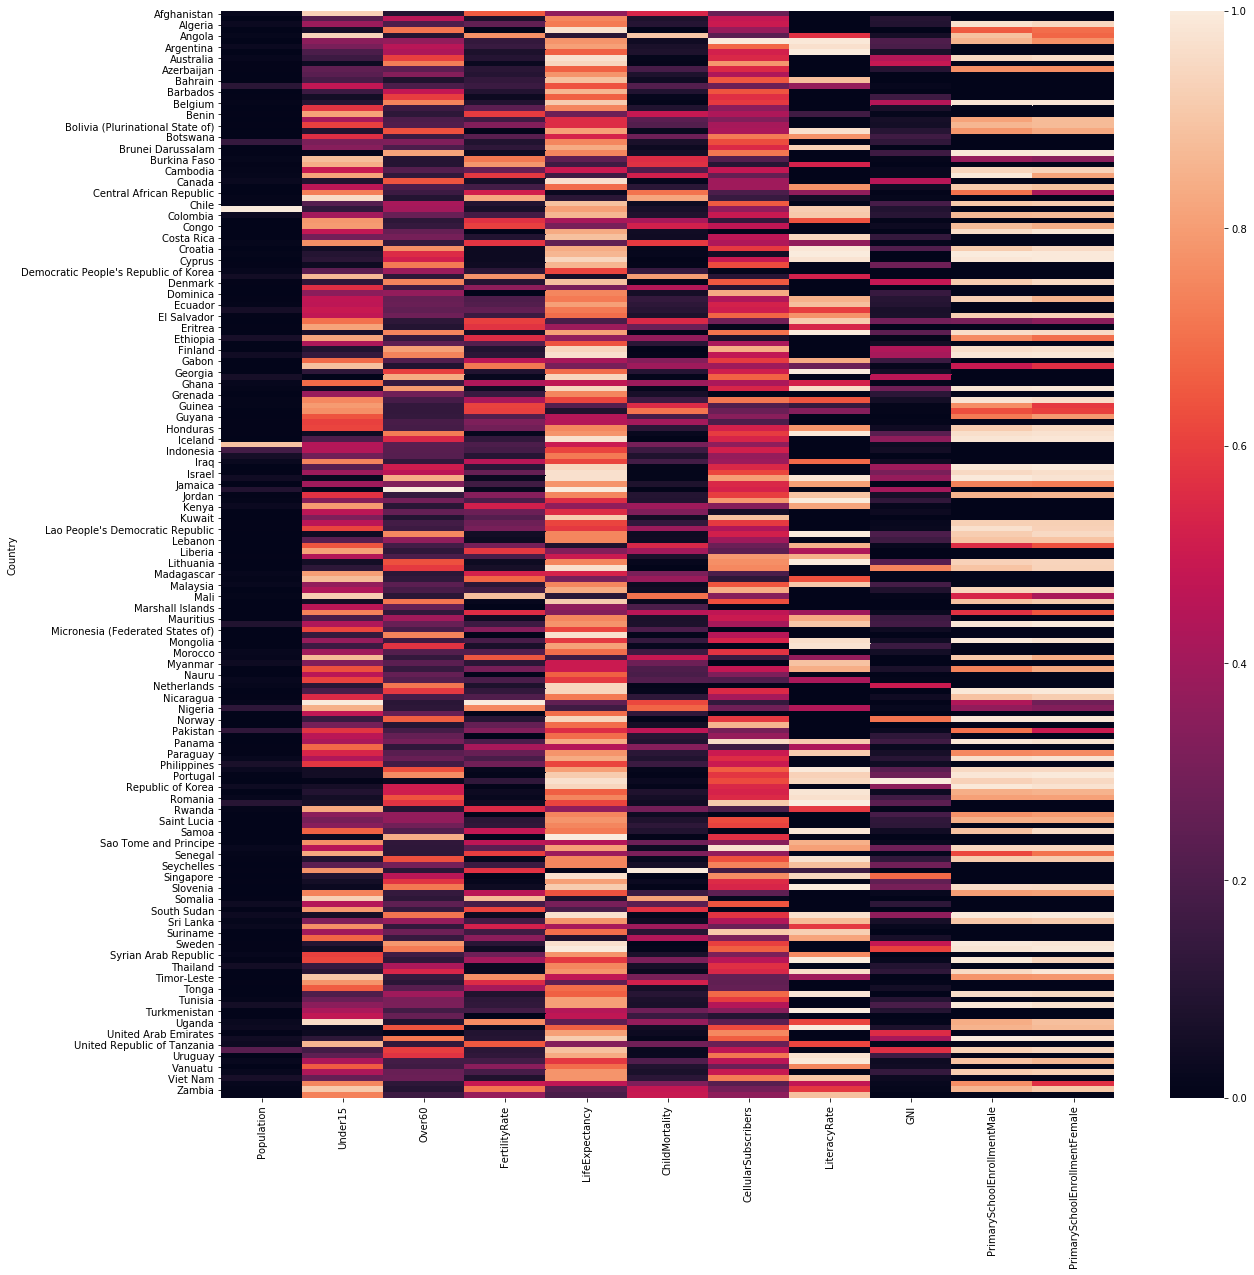

In [11]:
d=pd.DataFrame()
for i in df :
    if i not in ['Region','Country']:
        d[i]=minmax_scale(df[i].values)
    else:
        d[i]=df['Country'].values
d.drop('Region',inplace=True,axis=1)
d.set_index('Country',inplace=True)
d.fillna(0,inplace=True)    
plt.figure(figsize=(20,20))
sns.heatmap(d)

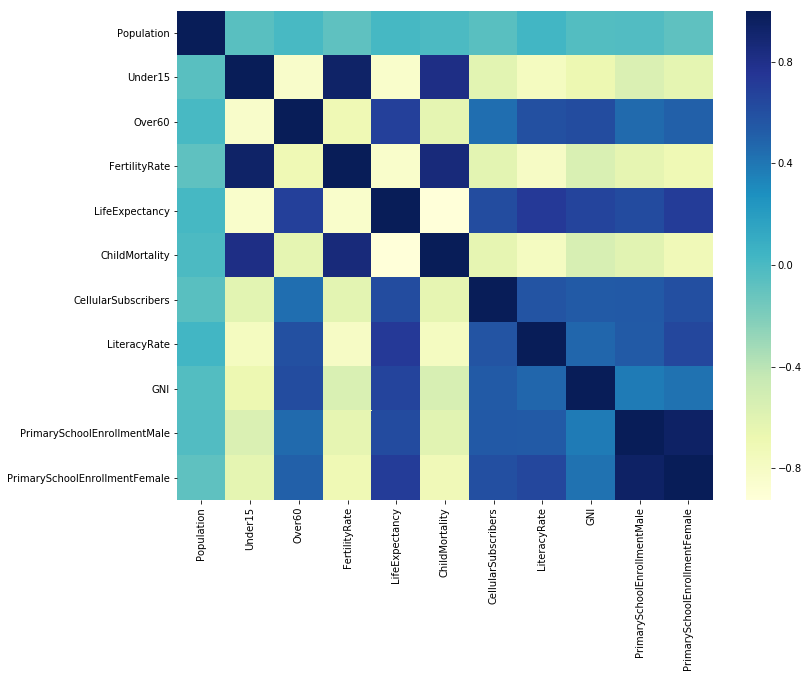

In [12]:
corr=df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,cmap="YlGnBu")

In [13]:
import pycountry

In [14]:
for i in df['Country'].values:
    if pycountry.countries.get(name=i) == None:
        print(i)

Bolivia (Plurinational State of)
Cape Verde
Ivory Coast
Czech Republic
Democratic People's Republic of Korea
Democratic Republic of the Congo
Iran (Islamic Republic of)
Micronesia (Federated States of)
Republic of Korea
Republic of Moldova
Swaziland
The former Yugoslav Republic of Macedonia
United Republic of Tanzania
United States of America
Venezuela (Bolivarian Republic of)


In [15]:
not_con='''
Bolivia (Plurinational State of)
BOL
Cape Verde
CPV
Ivory Coast
CIV
Czech Republic
CZE
Democratic People's Republic of Korea
PRK
Democratic Republic of the Congo
COD
Iran (Islamic Republic of)
IRN
Micronesia (Federated States of)
FSM
Republic of Korea
KOR
Republic of Moldova
MDA 
Swaziland
SWZ
The former Yugoslav Republic of Macedonia
MKD
United Republic of Tanzania
TZA
United States of America
USA
Venezuela (Bolivarian Republic of)
VEN
'''

In [16]:
def co_code(x,not_con):
    co = pycountry.countries.get(name=x)
    if co != None:
         return co.alpha_3
    else:
        for c in range(len(not_con)):
            if not_con[c]==x :
                return not_con[c+1]
    print(x)
    return np.nan
    
df['code']=df['Country'].apply(lambda x:co_code(x,not_con.split('\n')))
#dd=df[pd.notnull(df['code'])]


In [17]:
df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale,code
0,Afghanistan,Eastern Mediterranean,29825000,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN,AFG
1,Albania,Europe,3162000,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN,ALB
2,Algeria,Africa,38482000,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4,DZA
3,Andorra,Europe,78000,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4,AND
4,Angola,Africa,20821000,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2,AGO


In [18]:
import geopandas

In [19]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [20]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [21]:
len(world['name'])

177

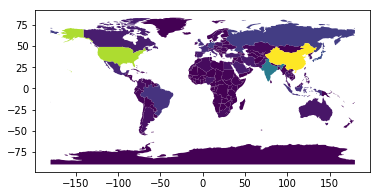

In [22]:
world.plot('gdp_md_est')

In [23]:
w=world

In [24]:
w=w.merge(df,left_on='iso_a3', right_on='code')

In [25]:
w.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale,code
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Western Pacific,875000,28.88,8.38,2.64,70,22.4,83.72,NaN,4610.0,NaN,NaN,FJI
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",United Republic of Tanzania,Africa,47783000,44.85,4.89,5.36,59,54.0,55.53,73.2,1500.0,NaN,NaN,TZA
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,Americas,34838000,16.37,20.82,1.66,82,5.3,79.73,NaN,39660.0,NaN,NaN,CAN
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,Americas,318000000,19.63,19.31,2.00,79,7.1,92.72,NaN,48820.0,95.4,96.1,USA
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Europe,16271000,25.46,10.04,2.52,67,18.7,155.74,99.7,11250.0,NaN,NaN,KAZ


Text(0.5, 1.0, '')

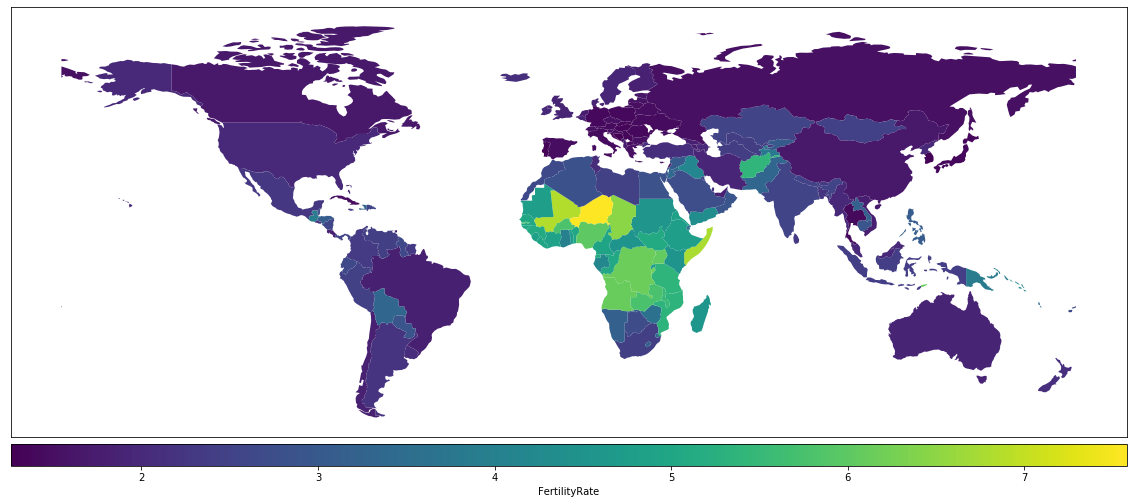

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1,figsize=(20,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

w.plot(column='FertilityRate', ax=ax, legend=True, cax=cax,
      legend_kwds={'label': "FertilityRate",'orientation': "horizontal" })
plt.title('', fontsize=16)

In [27]:
def create_map(w,conti,col,color,shape=(25,23)):
    if type(conti)== list:
        data = w.query("continent  in {}".format(str(conti)))
    elif conti=='all':
        data=w
        conti='The world'
    else:
        data=w[w['continent']==conti]
    #data.dropna(col,inplace=True)
    #data[pd.notnull(data[col])]
    fig, ax = plt.subplots(1, 1,figsize=shape)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.1)

    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    data.plot(color="grey",ax=ax,cax=cax)
    data[np.isfinite(data[col])].plot(column=col, ax=ax, legend=True, cax=cax,cmap=color,
          legend_kwds={'label': col ,'orientation': "horizontal" })
   

    tt='This figure show {} for each contrey in {}'.format(col,conti)
    plt.title(tt, fontsize=16,pad=20)
    plt.show()

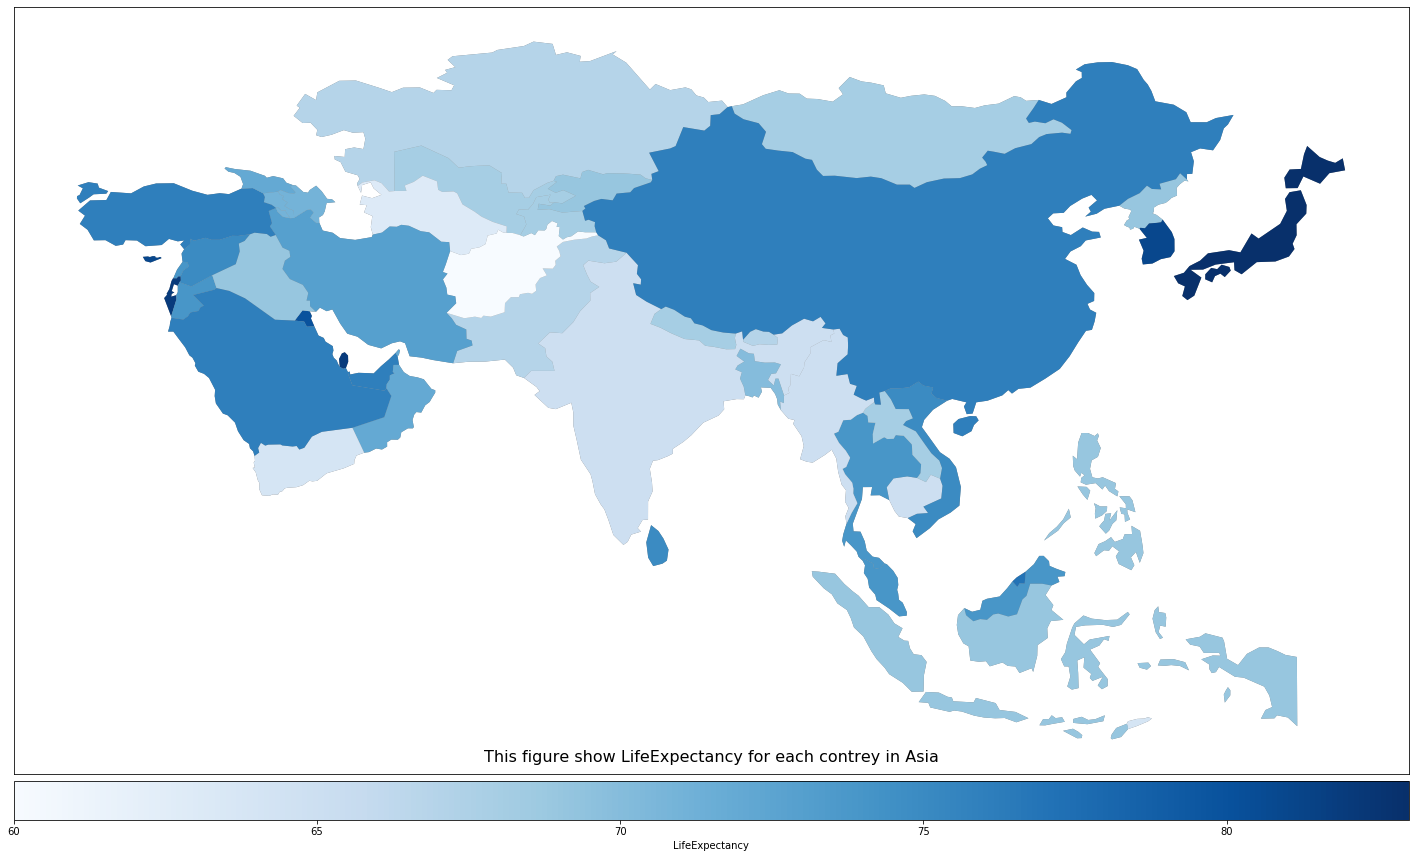

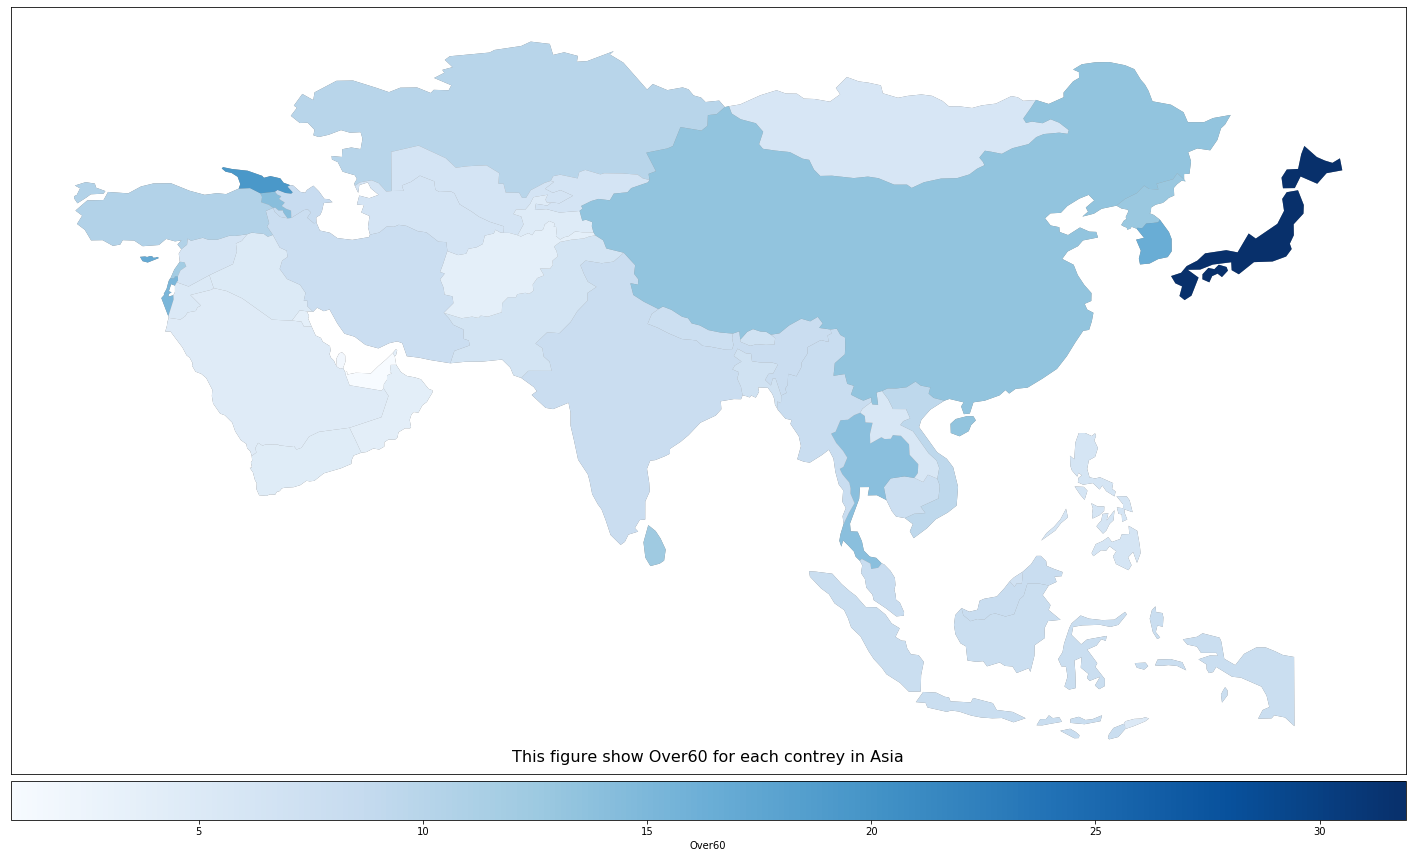

In [35]:
create_map(w,'Asia','LifeExpectancy','Blues')
create_map(w,'Asia','Over60','Blues')

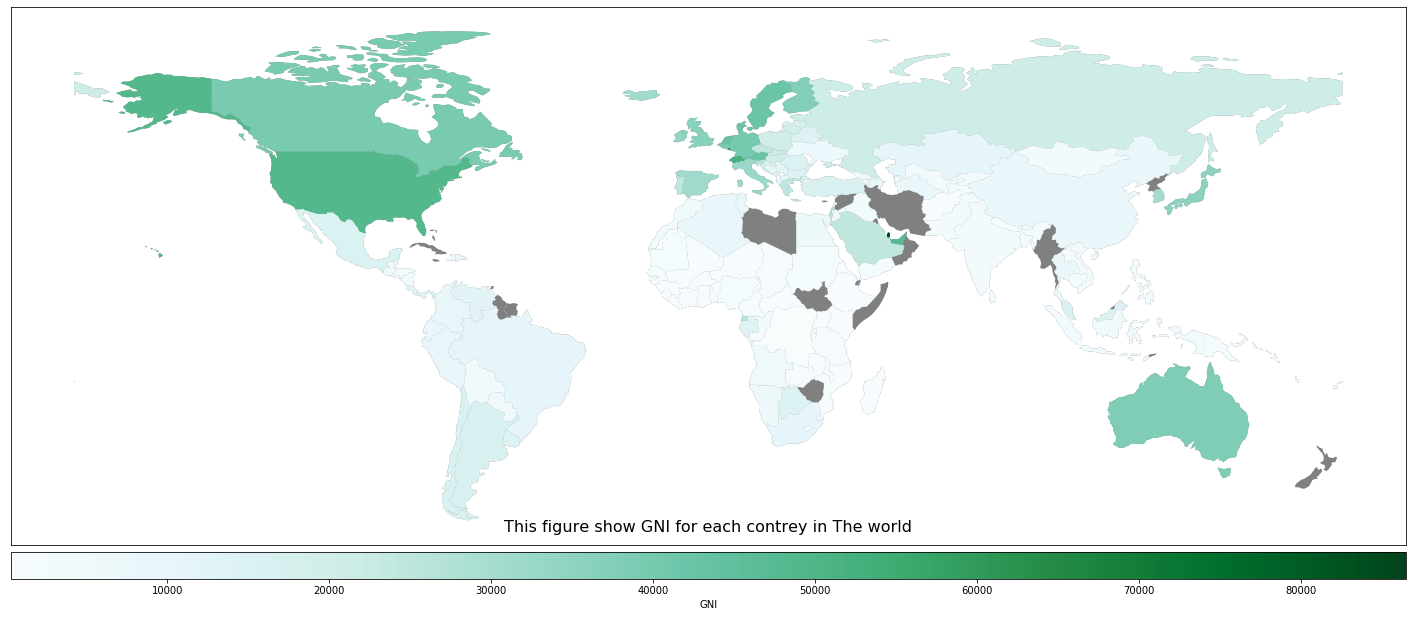

In [29]:
create_map(w,'all','GNI','BuGn')

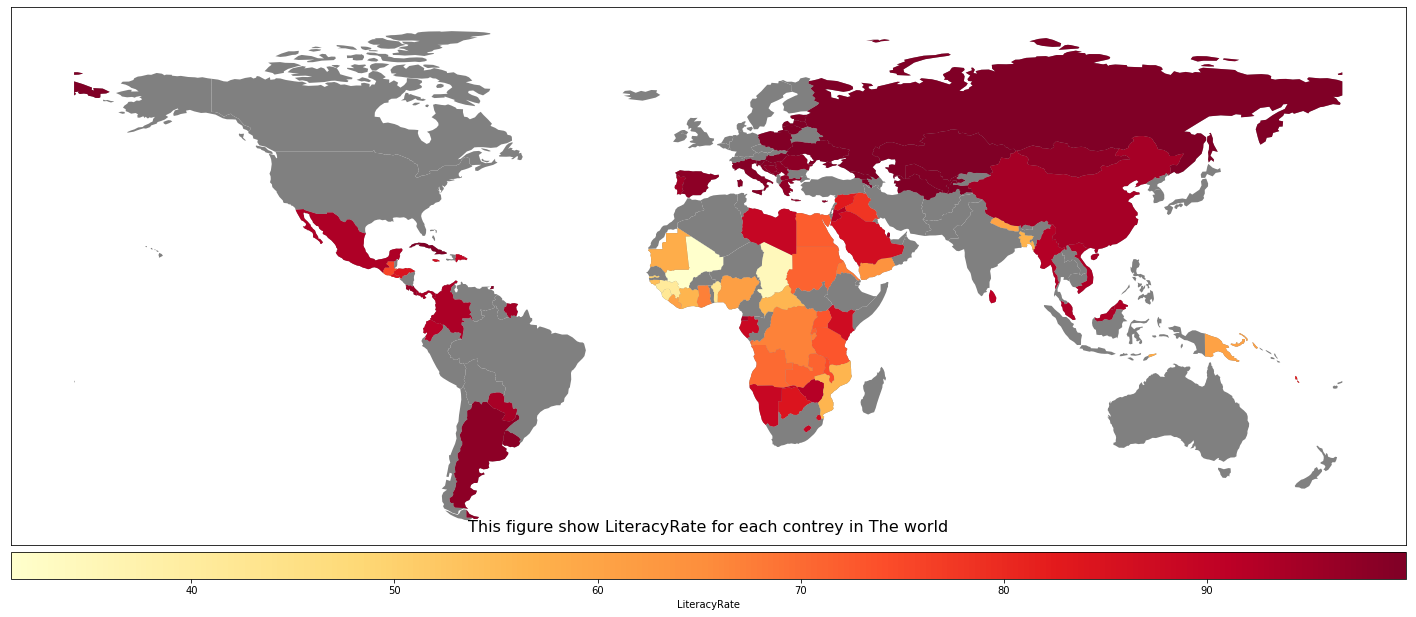

In [38]:
#LiteracyRate
create_map(w,'all','LiteracyRate','YlOrRd')


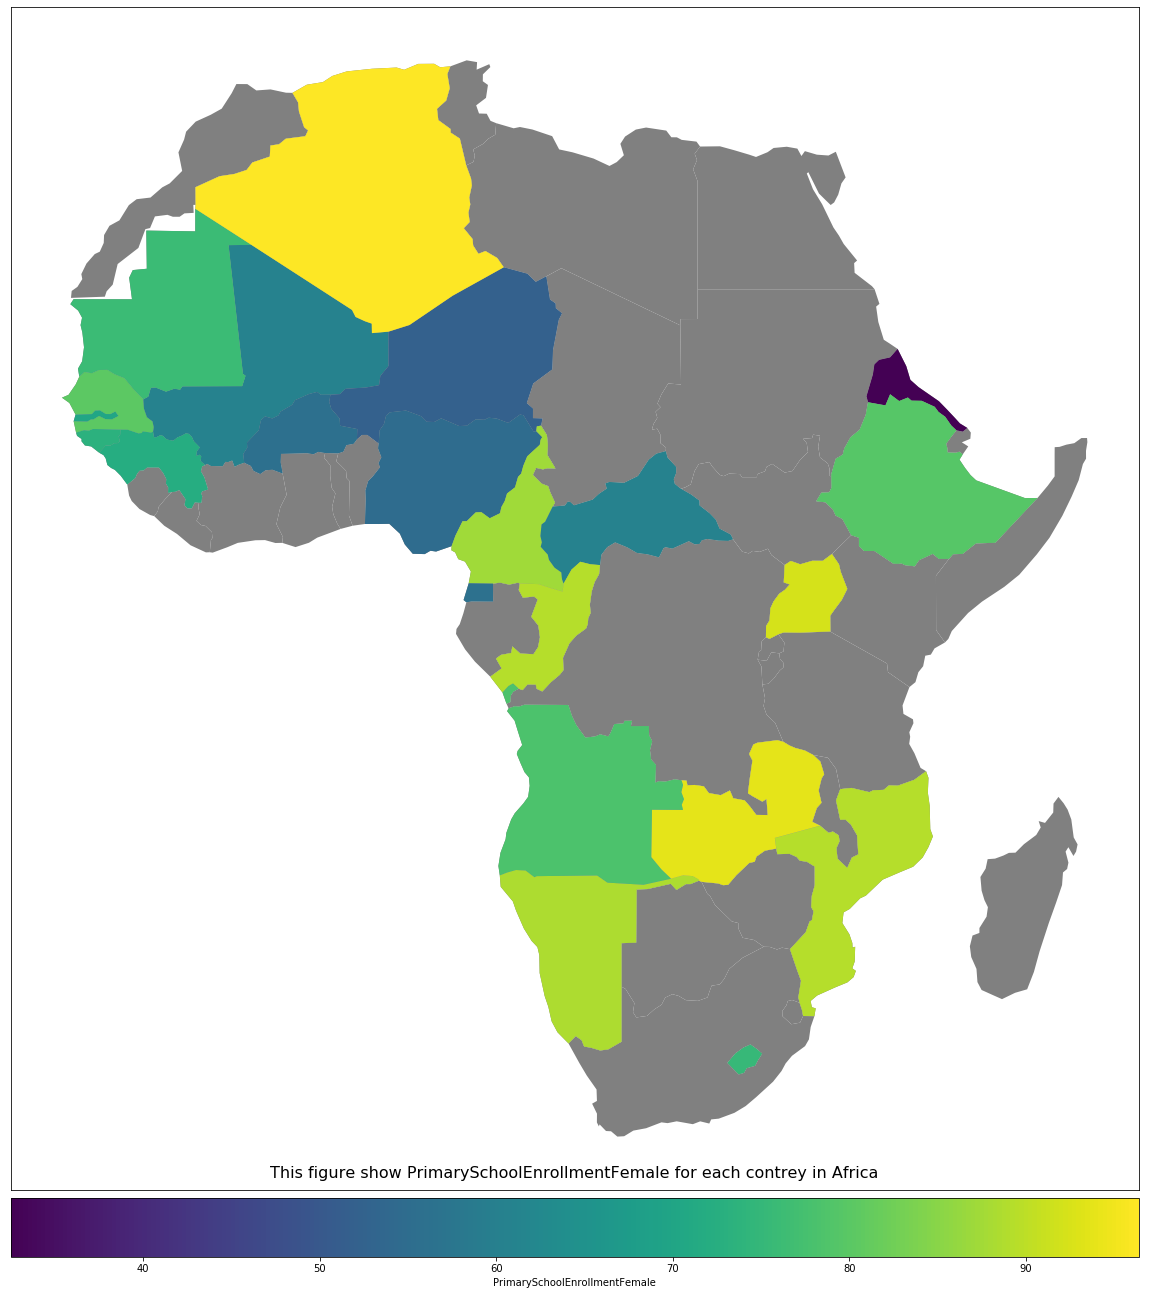

In [31]:
#PrimarySchoolEnrollmentFemale
create_map(w,'Africa','PrimarySchoolEnrollmentFemale','viridis')

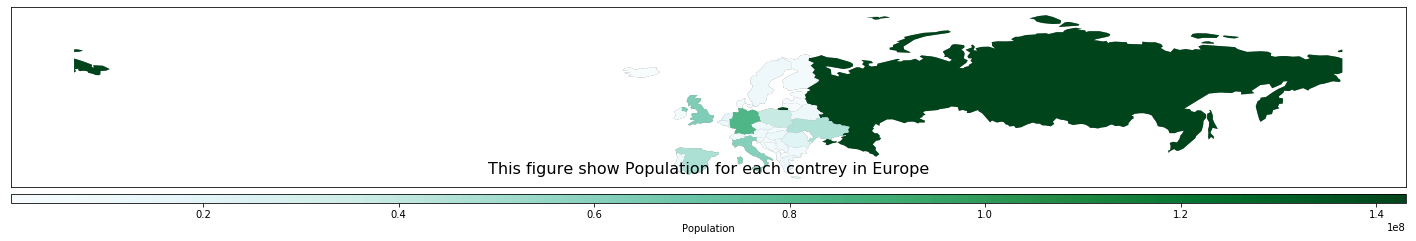

In [32]:
#europe
create_map(w,'Europe','Population','BuGn',(25,20))

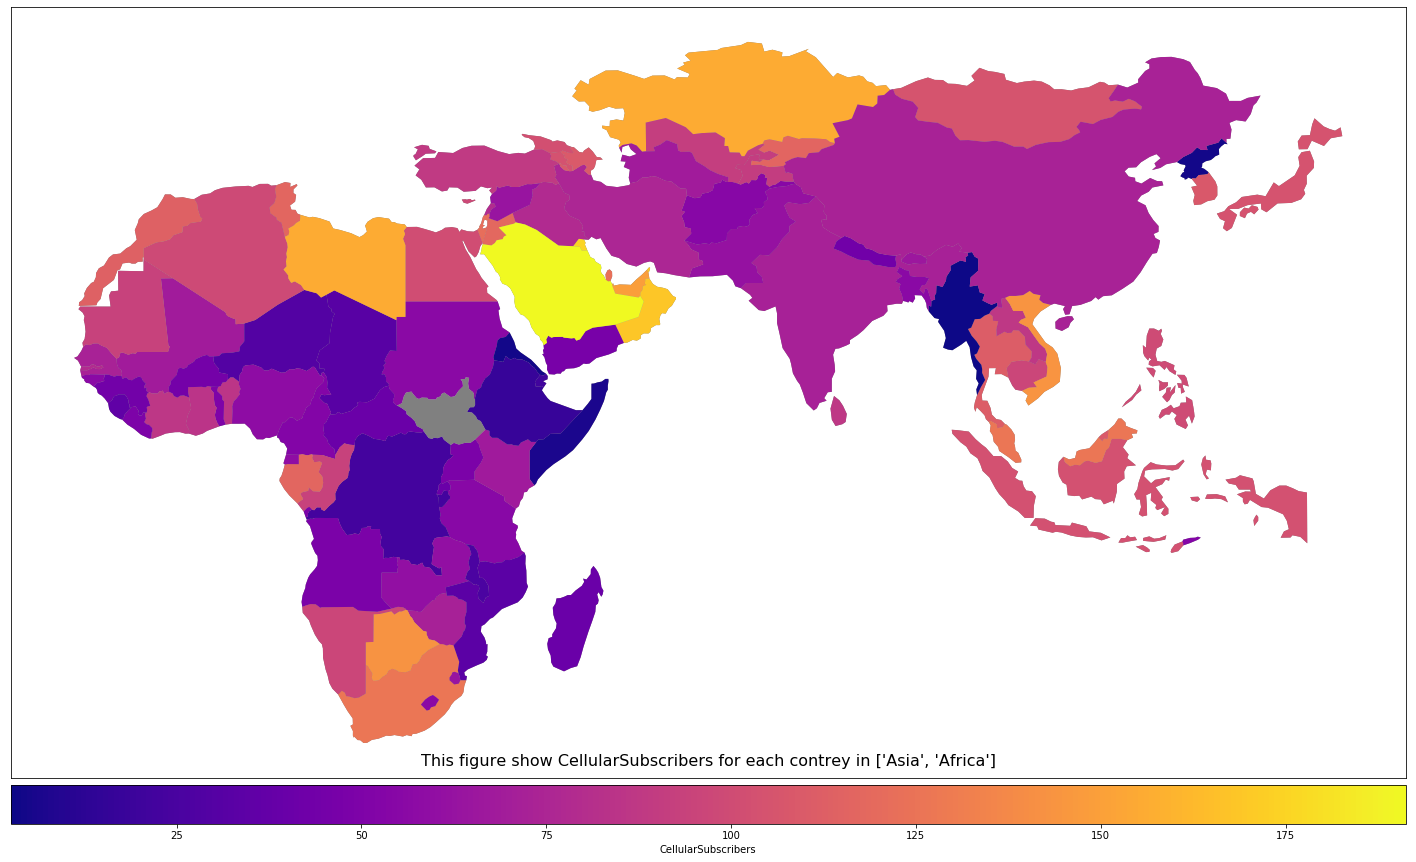

In [33]:
#CellularSubscribers
create_map(w,['Asia','Africa'],'CellularSubscribers','plasma')